# Searching the Catalog

In [58]:
api_url = "https://earth-search.aws.element84.com/v1"

In [59]:
from pystac_client import Client

In [60]:
client = Client.open(api_url)

In [61]:
collection = "sentinel-2-l2a"

In [62]:
from shapely.geometry import Point
point = Point(4.89, 52.37)

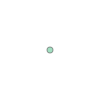

In [63]:
point

In [64]:
search = client.search(
    collections=[collection],
    intersects=point,
    max_items=10
)


<Item id=S1A_IW_GRDH_1SDV_20240214T103457_20240214T103510_052553_065B55>
<Item id=S1A_EW_GRDM_1SDH_20240214T101917_20240214T102011_052553_065B53>
<Item id=S1A_IW_GRDH_1SDV_20240214T100412_20240214T100437_052553_065B52>
<Item id=S1A_IW_GRDH_1SDV_20240214T100347_20240214T100412_052553_065B52>
<Item id=S1A_IW_GRDH_1SDV_20240214T100322_20240214T100347_052553_065B52>
<Item id=S1A_IW_GRDH_1SDV_20240214T100257_20240214T100322_052553_065B52>
<Item id=S1A_IW_GRDH_1SDV_20240214T100232_20240214T100257_052553_065B52>
<Item id=S1A_IW_GRDH_1SDV_20240214T100207_20240214T100232_052553_065B52>
<Item id=S1A_IW_GRDH_1SDV_20240214T100142_20240214T100207_052553_065B52>
<Item id=S1A_IW_GRDH_1SDV_20240214T100117_20240214T100142_052553_065B52>
<Item id=S1A_IW_GRDH_1SDV_20240214T100052_20240214T100117_052553_065B52>
<Item id=S1A_IW_GRDH_1SDV_20240214T100027_20240214T100052_052553_065B52>
<Item id=S1A_IW_GRDH_1SDV_20240214T095446_20240214T095511_052553_065B51>
<Item id=S1A_IW_GRDH_1SDV_20240214T095421_20240214T

KeyboardInterrupt: 

In [48]:
print(search.matched())

0


In [44]:
items = search.item_collection()
print(len(items))

0


In [10]:
for item in items:
    print(item)

<Item id=S2B_31UFU_20240211_0_L2A>
<Item id=S2A_31UFU_20240209_0_L2A>
<Item id=S2A_31UFU_20240206_0_L2A>
<Item id=S2B_31UFU_20240204_0_L2A>
<Item id=S2B_31UFU_20240201_0_L2A>
<Item id=S2A_31UFU_20240130_0_L2A>
<Item id=S2A_31UFU_20240127_0_L2A>
<Item id=S2B_31UFU_20240125_0_L2A>
<Item id=S2B_31UFU_20240122_0_L2A>
<Item id=S2A_31UFU_20240120_0_L2A>


In [11]:
item = items[0]
print(item.properties)


{'created': '2024-02-11T15:53:47.019Z', 'platform': 'sentinel-2b', 'constellation': 'sentinel-2', 'instruments': ['msi'], 'eo:cloud_cover': 99.999982, 'proj:epsg': 32631, 'mgrs:utm_zone': 31, 'mgrs:latitude_band': 'U', 'mgrs:grid_square': 'FU', 'grid:code': 'MGRS-31UFU', 'view:sun_azimuth': 162.614223613994, 'view:sun_elevation': 21.628626398094397, 's2:degraded_msi_data_percentage': 0.0071, 's2:nodata_pixel_percentage': 33.282125, 's2:saturated_defective_pixel_percentage': 0, 's2:dark_features_percentage': 0, 's2:cloud_shadow_percentage': 1e-05, 's2:vegetation_percentage': 0, 's2:not_vegetated_percentage': 0, 's2:water_percentage': 1e-05, 's2:unclassified_percentage': 0, 's2:medium_proba_clouds_percentage': 27.465132, 's2:high_proba_clouds_percentage': 72.378111, 's2:thin_cirrus_percentage': 0.156737, 's2:snow_ice_percentage': 0, 's2:product_type': 'S2MSI2A', 's2:processing_baseline': '05.10', 's2:product_uri': 'S2B_MSIL2A_20240211T104059_N0510_R008_T31UFU_20240211T132748.SAFE', 's2:g

In [12]:
print(item.geometry)

{'type': 'Polygon', 'coordinates': [[[5.239133330751748, 53.2285835157763], [4.814264696071784, 52.24861376462345], [6.071664488869862, 52.22257539160585], [6.141754296879459, 53.20819279121764], [5.239133330751748, 53.2285835157763]]]}


In [13]:
print(item.datetime)

2024-02-11 10:46:26.359000+00:00


In [16]:
print(item.extra_fields)

{}


In [18]:
bbox = point.buffer(0.01).bounds

In [23]:
search = client.search(
    collections=[collection],
    bbox=bbox,
    datetime="2020-03-20/2020-03-30",
    query=["eo:cloud_cover<15"]
)
    
    

In [24]:
print(search.matched())

6


In [25]:
items = search.item_collection()
items.save_object("search.json")

In [26]:
assets = items[0].assets

In [28]:
for key, asset in assets.items():
    print(key, asset.title)

aot Aerosol optical thickness (AOT)
blue Blue (band 2) - 10m
coastal Coastal aerosol (band 1) - 60m
granule_metadata None
green Green (band 3) - 10m
nir NIR 1 (band 8) - 10m
nir08 NIR 2 (band 8A) - 20m
nir09 NIR 3 (band 9) - 60m
red Red (band 4) - 10m
rededge1 Red edge 1 (band 5) - 20m
rededge2 Red edge 2 (band 6) - 20m
rededge3 Red edge 3 (band 7) - 20m
scl Scene classification map (SCL)
swir16 SWIR 1 (band 11) - 20m
swir22 SWIR 2 (band 12) - 20m
thumbnail Thumbnail image
tileinfo_metadata None
visual True color image
wvp Water vapour (WVP)
aot-jp2 Aerosol optical thickness (AOT)
blue-jp2 Blue (band 2) - 10m
coastal-jp2 Coastal aerosol (band 1) - 60m
green-jp2 Green (band 3) - 10m
nir-jp2 NIR 1 (band 8) - 10m
nir08-jp2 NIR 2 (band 8A) - 20m
nir09-jp2 NIR 3 (band 9) - 60m
red-jp2 Red (band 4) - 10m
rededge1-jp2 Red edge 1 (band 5) - 20m
rededge2-jp2 Red edge 2 (band 6) - 20m
rededge3-jp2 Red edge 3 (band 7) - 20m
scl-jp2 Scene classification map (SCL)
swir16-jp2 SWIR 1 (band 11) - 20m


In [29]:
print(assets["thumbnail"].href)

https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/thumbnail.jpg
